[過学習と学習不足について知る  \|  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ja)

- 過学習 (overfitting)
- 学習不足 (underfitting)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


### IMDBデータセットのダウンロード

文をマルチホットエンコードする。
例えば `[3, 5]` というシーケンスを、インデックス3と5の値が1で、それ以外がすべて0の、10,000次元のベクトルに変換する。

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

# リストをマルチホットエンコードする
def multi_hot_sequences(sequences, dimension):
    # 形状が (len(sequences), dimension) ですべて0の行列を作る
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 特定のインデックスに対して results[i] を１に設定する
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


文のマルチホットベクトルを確認する

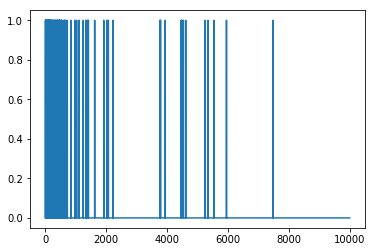

In [3]:
plt.plot(train_data[0])
plt.show()

## 過学習のデモ

過学習を防止するための最も単純な方法は、モデルのサイズ、すなわち、モデル内の学習可能なパラメータの数を小さくすることです（学習パラメータの数は、層の数と層ごとのユニット数で決まります）。

「ディープラーニングのモデルは訓練用データに適応しやすいけれど、本当のチャレレンジは汎化であって適応ではない」****

### 比較基準を作る

In [4]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5027 - accuracy: 0.8060 - binary_crossentropy: 0.5027 - val_loss: 0.3506 - val_accuracy: 0.8750 - val_binary_crossentropy: 0.3506
Epoch 2/20
25000/25000 - 2s - loss: 0.2607 - accuracy: 0.9097 - binary_crossentropy: 0.2607 - val_loss: 0.2871 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2871
Epoch 3/20
25000/25000 - 2s - loss: 0.1909 - accuracy: 0.9338 - binary_crossentropy: 0.1909 - val_loss: 0.2856 - val_accuracy: 0.8862 - val_binary_crossentropy: 0.2856
Epoch 4/20
25000/25000 - 2s - loss: 0.1532 - accuracy: 0.9468 - binary_crossentropy: 0.1532 - val_loss: 0.3044 - val_accuracy: 0.8814 - val_binary_crossentropy: 0.3044
Epoch 5/20
25000/25000 - 2s - loss: 0.1252 - accuracy: 0.9594 - binary_crossentropy: 0.1252 - val_loss: 0.3297 - val_accuracy: 0.8763 - val_binary_crossentropy: 0.3297
Epoch 6/20
25000/25000 - 2s - loss: 0.1060 - accuracy: 0.9652 - binary_crossentropy: 0.1060 - val_loss: 0.3585

### より小さいモデルの構築

隠れユニット数が少ないモデルを作る

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6343 - accuracy: 0.5562 - binary_crossentropy: 0.6343 - val_loss: 0.5804 - val_accuracy: 0.6074 - val_binary_crossentropy: 0.5804
Epoch 2/20
25000/25000 - 2s - loss: 0.5307 - accuracy: 0.7356 - binary_crossentropy: 0.5307 - val_loss: 0.5157 - val_accuracy: 0.7961 - val_binary_crossentropy: 0.5157
Epoch 3/20
25000/25000 - 2s - loss: 0.4669 - accuracy: 0.8600 - binary_crossentropy: 0.4669 - val_loss: 0.4783 - val_accuracy: 0.8462 - val_binary_crossentropy: 0.4783
Epoch 4/20
25000/25000 - 2s - loss: 0.4220 - accuracy: 0.9032 - binary_crossentropy: 0.4220 - val_loss: 0.4533 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.4533
Epoch 5/20
25000/25000 - 2s - loss: 0.3792 - accuracy: 0.9286 - binary_crossentropy: 0.3792 - val_loss: 0.4201 - val_accuracy: 0.8621 - val_binary_crossentropy: 0.4201
Epoch 6/20
25000/25000 - 2s - loss: 0.2842 - accuracy: 0.9476 - binary_crossentropy: 0.2842 - val_loss: 0.3166

### より大きなモデルの構築

隠れユニット数が少ないモデルを作ることで、過学習する様子を見る

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 8s - loss: 0.3537 - accuracy: 0.8468 - binary_crossentropy: 0.3537 - val_loss: 0.2991 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.2991
Epoch 2/20
25000/25000 - 7s - loss: 0.1526 - accuracy: 0.9450 - binary_crossentropy: 0.1526 - val_loss: 0.3310 - val_accuracy: 0.8742 - val_binary_crossentropy: 0.3310
Epoch 3/20
25000/25000 - 7s - loss: 0.0584 - accuracy: 0.9814 - binary_crossentropy: 0.0584 - val_loss: 0.4512 - val_accuracy: 0.8621 - val_binary_crossentropy: 0.4512
Epoch 4/20
25000/25000 - 7s - loss: 0.0096 - accuracy: 0.9984 - binary_crossentropy: 0.0096 - val_loss: 0.5647 - val_accuracy: 0.8695 - val_binary_crossentropy: 0.5647
Epoch 5/20
25000/25000 - 7s - loss: 0.0016 - accuracy: 1.0000 - binary_crossentropy: 0.0016 - val_loss: 0.6632 - val_accuracy: 0.8692 - val_binary_crossentropy: 0.6632
Epoch 6/20
25000/25000 - 7s - loss: 3.0642e-04 - accuracy: 1.0000 - binary_crossentropy: 3.0642e-04 - val_loss

### 訓練時と検証時の損失をグラフにする

historyについて
- <指標名> : 訓練データに対しての値
- val_<指標名> : 検証データ(Validation Data)に対しての値

In [10]:
baseline_history.history.keys()

dict_keys(['loss', 'accuracy', 'binary_crossentropy', 'val_loss', 'val_accuracy', 'val_binary_crossentropy'])

- 実線は訓練用データセットでの損失 ... エポックを回すほど低くなる
- 破線は検証用データセットでの損失 ... 小さい値ほど汎化性能が高く、大きい値になるほど過学習が起きていることを表す

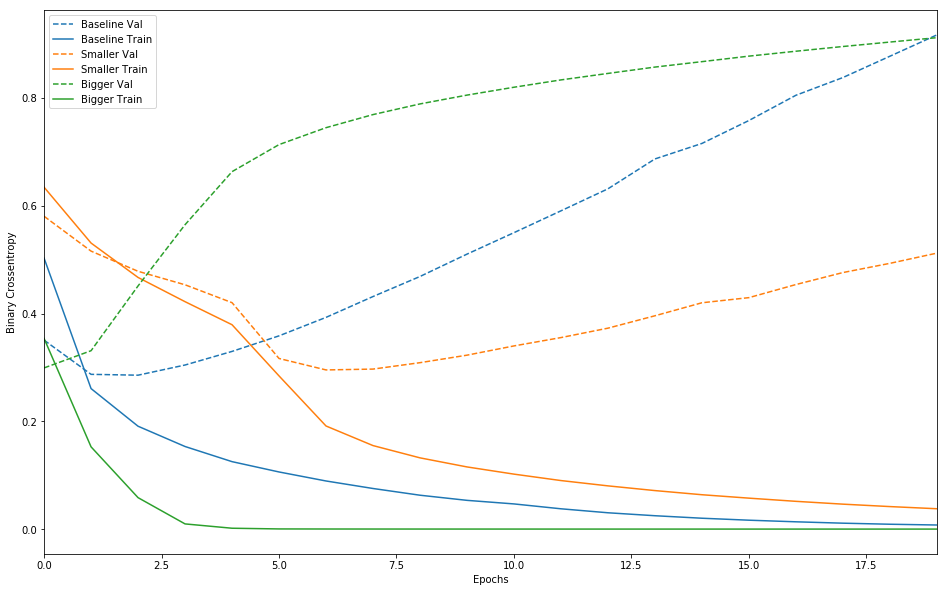

In [11]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

- 基準のネットワークでは4エポック後から過学習が始まる
- 小さいネットワークでは6エポック後から過学習が始まり、過学習が始まっても性能の低下がよりゆっくりしている
- 大きなネットワークでは1エポックで過学習が始まり、その度合も強い

### 過学習防止の戦略

「オッカムの剃刀」とは「ある事柄を説明するためには、必要以上に多くを仮定するべきでない」とする指針。

最も正しいと考えられる説明は、仮定の数が最も少ない「一番単純な」説明だというもの。この原理はニューラルネットワークにも当てはまる。つまり、複数のモデルがあるとき、単純なモデルのほうが複雑なものよりも過学習しにくい。

「単純なモデル」とは
- パラメータの数が少ないもの (隠れユニットの数を減らす)
- パラメータ値の分布のエントロピーが小さい (重みの正規化を加える)

過学習を緩和するための一般的な手法は、重みが小さい値のみをとることで、重み値の分布がより整然となる様に制約を与える

- L1正則化 : 重み係数の絶対値に比例するコストを加える（重みの「L1ノルム」と呼ばれる）。
- L2正則化 : 重み係数の二乗に比例するコストを加える（重み係数の二乗「L2ノルム」と呼ばれる）。L2正則化はニューラルネットワーク用語では重み減衰（Weight Decay）と呼ばれる。

特徴：

- L1正則化は重みパラメータの一部を0にすることでモデルを疎にする効果がある。
- L2正則化は重みパラメータにペナルティを加えるがモデルを疎にすることはない。これは、L2正則化のほうが一般的である理由の一つである

`tf.keras` で重みの正規化はDenseのキーワード引数 `kernel_regularizer` を加えるだけ。

`l2(0.001)` は、層の重み行列の係数全てに対して `0.001 * 重み係数の値**2` をネットワークの損失値合計に加えることを意味する。このペナルティは訓練時のみに加えられるため、テスト時よりも訓練時の方が損失値は大きくなる。

In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5675 - accuracy: 0.7580 - binary_crossentropy: 0.5277 - val_loss: 0.4107 - val_accuracy: 0.8746 - val_binary_crossentropy: 0.3685
Epoch 2/20
25000/25000 - 2s - loss: 0.3262 - accuracy: 0.9047 - binary_crossentropy: 0.2778 - val_loss: 0.3429 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2903
Epoch 3/20
25000/25000 - 2s - loss: 0.2683 - accuracy: 0.9256 - binary_crossentropy: 0.2128 - val_loss: 0.3400 - val_accuracy: 0.8875 - val_binary_crossentropy: 0.2829
Epoch 4/20
25000/25000 - 2s - loss: 0.2431 - accuracy: 0.9361 - binary_crossentropy: 0.1844 - val_loss: 0.3518 - val_accuracy: 0.8816 - val_binary_crossentropy: 0.2921
Epoch 5/20
25000/25000 - 2s - loss: 0.2296 - accuracy: 0.9420 - binary_crossentropy: 0.1688 - val_loss: 0.3668 - val_accuracy: 0.8776 - val_binary_crossentropy: 0.3054
Epoch 6/20
25000/25000 - 2s - loss: 0.2166 - accuracy: 0.9474 - binary_crossentropy: 0.1544 - val_loss: 0.3709

#### L2正規化の影響を確認する

L2正則化あり（オレンジ）は、比較基準（青）に比べて過学習しにくくなっている。

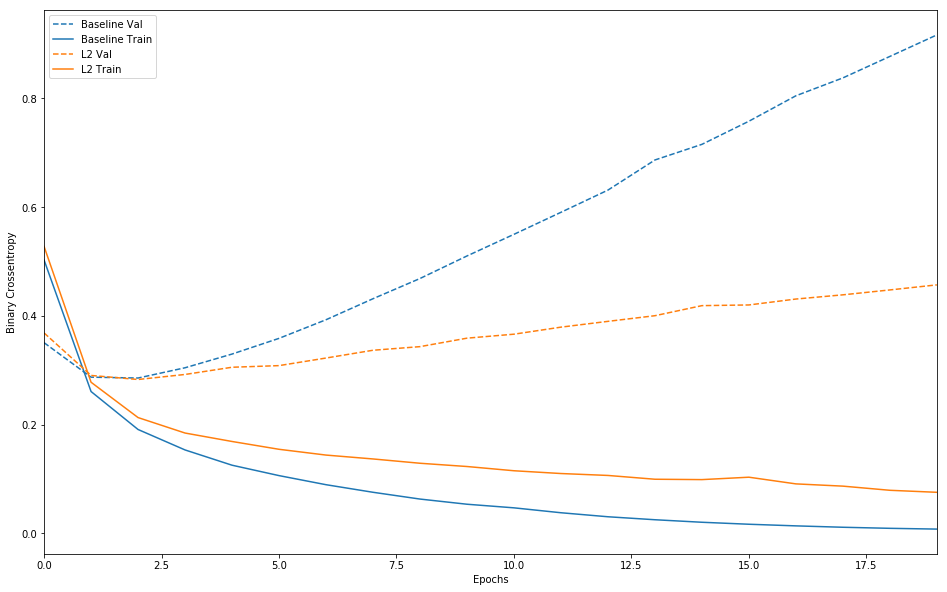

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### ドロップアウトを追加する

訓練時に層から出力された特徴量に対してランダムに「ドロップアウト（つまりゼロ化）」を行う。

例えば `[0.2, 0.5, 1.3, 0.8, 1.1]` というベクトルを出力するのに対して、ドロップアウトを適用すると、`[0, 0.5, 1.3, 0, 1.1]` のようにランダムに散らばったいくつかのゼロを含むようになる。

「ドロップアウト率」はゼロ化される特徴の割合で、通常は0.2から0.5の間に設定する。

テスト時は、どのユニットもドロップアウトされず、代わりに出力値がドロップアウト率と同じ比率でスケールダウンされる（訓練時に比べてたくさんのユニットがアクティブであることに対してバランスをとるため）。

`tf.keras` では、Dropout層を使ってドロップアウトをネットワークに導入できる。

In [14]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6282 - accuracy: 0.6436 - binary_crossentropy: 0.6282 - val_loss: 0.4901 - val_accuracy: 0.8528 - val_binary_crossentropy: 0.4901
Epoch 2/20
25000/25000 - 2s - loss: 0.4547 - accuracy: 0.8091 - binary_crossentropy: 0.4547 - val_loss: 0.3435 - val_accuracy: 0.8790 - val_binary_crossentropy: 0.3435
Epoch 3/20
25000/25000 - 2s - loss: 0.3535 - accuracy: 0.8697 - binary_crossentropy: 0.3535 - val_loss: 0.2885 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2885
Epoch 4/20
25000/25000 - 2s - loss: 0.2919 - accuracy: 0.8986 - binary_crossentropy: 0.2919 - val_loss: 0.2757 - val_accuracy: 0.8875 - val_binary_crossentropy: 0.2757
Epoch 5/20
25000/25000 - 2s - loss: 0.2471 - accuracy: 0.9141 - binary_crossentropy: 0.2471 - val_loss: 0.2789 - val_accuracy: 0.8869 - val_binary_crossentropy: 0.2789
Epoch 6/20
25000/25000 - 2s - loss: 0.2141 - accuracy: 0.9288 - binary_crossentropy: 0.2141 - val_loss: 0.2878

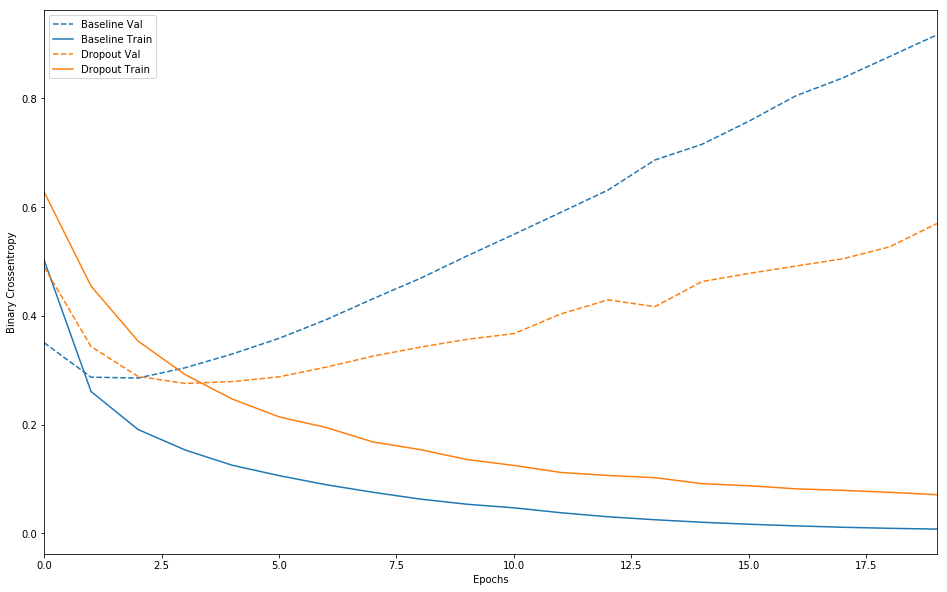

In [15]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

### まとめ

ニューラルネットワークにおいて過学習を防ぐ最も一般的な方法は次のとおりです。

- 訓練データを増やす
- ネットワークの容量（隠れユニットの数や層の数）を減らす
- 重みの正則化を行う
- ドロップアウトを追加する

その他に「データ拡張(Data Augmentation)」と「バッチ正規化(Batch Normalization)」がある。